# HuggingFace: Using Pre-trained LLMs

# LLM: GPT-2

Context: https://huggingface.co/openai-community/gpt2

In [1]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='openai-community/gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=2)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I\'m a language model, so you can\'t just use the same data model and just use different languages. There\'s a lot of overlap between languages because there are so many different languages.\n\nBut in a lot of cases, I have a lot of different languages. There is a lot of confusion about what\'s right. I sometimes have to put a lot of stuff in the right order, but then it\'s not so clear what it is. Sometimes there are multiple languages that are using different languages. So I have a lot of confusion.\n\nSo, for example, if you\'re doing a lot of cross-platform development, where you\'re developing for a large cross-platform platform, you\'re using a lot of different languages. And you may not be able to understand the language. But if you do a lot of cross-platform development, you can understand the language.\n\nAnd so there\'s a lot of confusion.\n\nWhen I talk to people about languages, I\'m kind of using the same language, but it\'s different.\n\nSo, I 

# Microsoft Phi2


Phi-2 is a Transformer with 2.7 billion parameters. It was trained using the same data sources as Phi-1.5, augmented with a new data source that consists of various NLP synthetic texts and filtered websites (for safety and educational value). When assessed against benchmarks testing common sense, language understanding, and logical reasoning, Phi-2 showcased a nearly state-of-the-art performance among models with less than 13 billion parameters.


HF: https://huggingface.co/microsoft/phi-2

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load model to GPU (cuda) if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load tokenizer and model from Hugging Face
model_id = "microsoft/phi-2"


tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32)
model.to(device)


Using device: cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (rotary_emb): PhiRotaryEmbedding()
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (final_layernorm): LayerNorm((2560,), eps=1

In [3]:
# Your prompt
prompt = "Explain quantum computing in simple terms."

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt").to(device)

# Generate output
with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=100)

# Decode and print
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain quantum computing in simple terms.
Answer: Quantum computing is a type of computer that uses the principles of quantum mechanics to perform calculations. It is different from traditional computers because it can solve problems much faster and more efficiently.

Exercise 2:
What is the difference between quantum computing and classical computing?
Answer: Quantum computing uses quantum bits, or qubits, which can exist in multiple states at the same time. This allows quantum computers to perform calculations simultaneously, making them much faster than classical computers.

Ex


# DeepSeek R1-Distill-Qwen-1.5B

DeepSeek R1-Distill-Qwen-1.5B is a distilled version of the Qwen-1.5B model. Distillation is a technique where a smaller model (the student) is trained to mimic the behavior of a larger, more powerful model (the teacher). This often results in a smaller, faster model that retains much of the performance of the larger model.

**Key Features:**

*   **Distilled Model:** Benefits from the knowledge of a larger model while being more efficient.
*   **Qwen-1.5B Base:** Built upon the Qwen-1.5B architecture.
*   **Text Generation:** Capable of generating text based on provided prompts.
*   **Parameters:** 1.5 billion
*   **Input Modality:** Text
*   **Output Modality:** Text
*   **Input Context Window Size:** Not explicitly stated, but likely similar to Qwen-1.5B (around 32k tokens).
*   **Output Context Window Size:** Not explicitly stated.
*   **Training Data:** Distilled from Qwen-1.5B, which was trained on a large corpus of text and code data.
*   **Organization:** DeepSeek AI

**Use Cases:**

*   Text generation tasks where efficiency is important.
*   Applications on devices with limited computational resources.

**Hugging Face:** [https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B)

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe(messages)

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': "Greetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have.\n</think>\n\nGreetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have."}]}]

# Qwen/Qwen3-0.6B

Qwen3-0.6B is a 0.6 billion parameter language model from the Qwen family of models. These models are known for their strong performance across various benchmarks.

**Key Features:**

*   **Parameters:** 0.6 billion
*   **Input Modality:** Text
*   **Output Modality:** Text
*   **Input Context Window Size:** Not explicitly stated, but typically large for Qwen models.
*   **Output Context Window Size:** Not explicitly stated.
*   **Training Data:** Trained on a large corpus of text and code data.
*   **Organization:** Qwen

**Use Cases:**

*   Text generation tasks.
*   Applications where a smaller, efficient model is suitable.

**Hugging Face:** [https://huggingface.co/Qwen/Qwen3-0.6B](https://huggingface.co/Qwen/Qwen3-0.6B)

In [5]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="Qwen/Qwen3-0.6B")
messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe(messages)

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': '<think>\nOkay, the user asked, "Who are you?" I need to respond appropriately. Let me start by acknowledging their question and then provide a brief introduction. I should mention that I\'m an AI assistant, but I can also add a bit about my capabilities. It\'s important to keep the response friendly and helpful. I should make sure the answer is concise and covers both my identity and what I can do. Let me check if there\'s any additional information needed, but I think that\'s all. Alright, time to put it all together in a natural way.\n</think>\n\nI\'m an AI assistant designed to help with questions and tasks. I can assist with various topics, answer queries, and provide support in different ways. Let me know how I can help!'}]}]

# TinyLlama/TinyLlama-1.1B-Chat-v1.0

TinyLlama-1.1B-Chat-v1.0 is a compact language model with 1.1 billion parameters, designed for chat-based applications. It's a smaller model, making it more efficient for deployment in resource-constrained environments.

**Key Features:**

*   **Parameters:** 1.1 billion
*   **Input Modality:** Text
*   **Output Modality:** Text
*   **Input Context Window Size:** Not explicitly stated, but optimized for conversational contexts.
*   **Output Context Window Size:** Not explicitly stated.
*   **Training Data:** Trained on a large corpus of text data with a focus on conversational examples.
*   **Organization:** TinyLlama

**Use Cases:**

*   Chatbots and conversational AI applications.
*   Text generation in interactive scenarios.
*   Deployment on devices with limited computational resources.

**Hugging Face:** [https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0](https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0)

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")
messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe(messages)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': 'I am a machine learning model trained on a vast dataset of historical data and news articles to identify patterns and relationships between variables, such as political events, economic indicators, and social trends. I use advanced algorithms, statistical techniques, and machine learning models to analyze large amounts of data, identify patterns, and make predictions. My job is to analyze data and make informed decisions based on the results.'}]}]

## Multimodal LLMs

## Microsoft Kosmos-2.5

Kosmos-2.5 is a multimodal literate model for machine reading of text-intensive images. Pre-trained on large-scale text-intensive images, Kosmos-2.5 excels in two distinct yet cooperative transcription tasks: (1) generating spatially-aware text blocks, where each block of text is assigned its spatial coordinates within the image, and (2) producing structured text output that captures styles and structures into the markdown format.

In [3]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 124.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.4
    Uninstalling transformers-4.55.4:
      Successfully uninstalled transformers-4.55.4


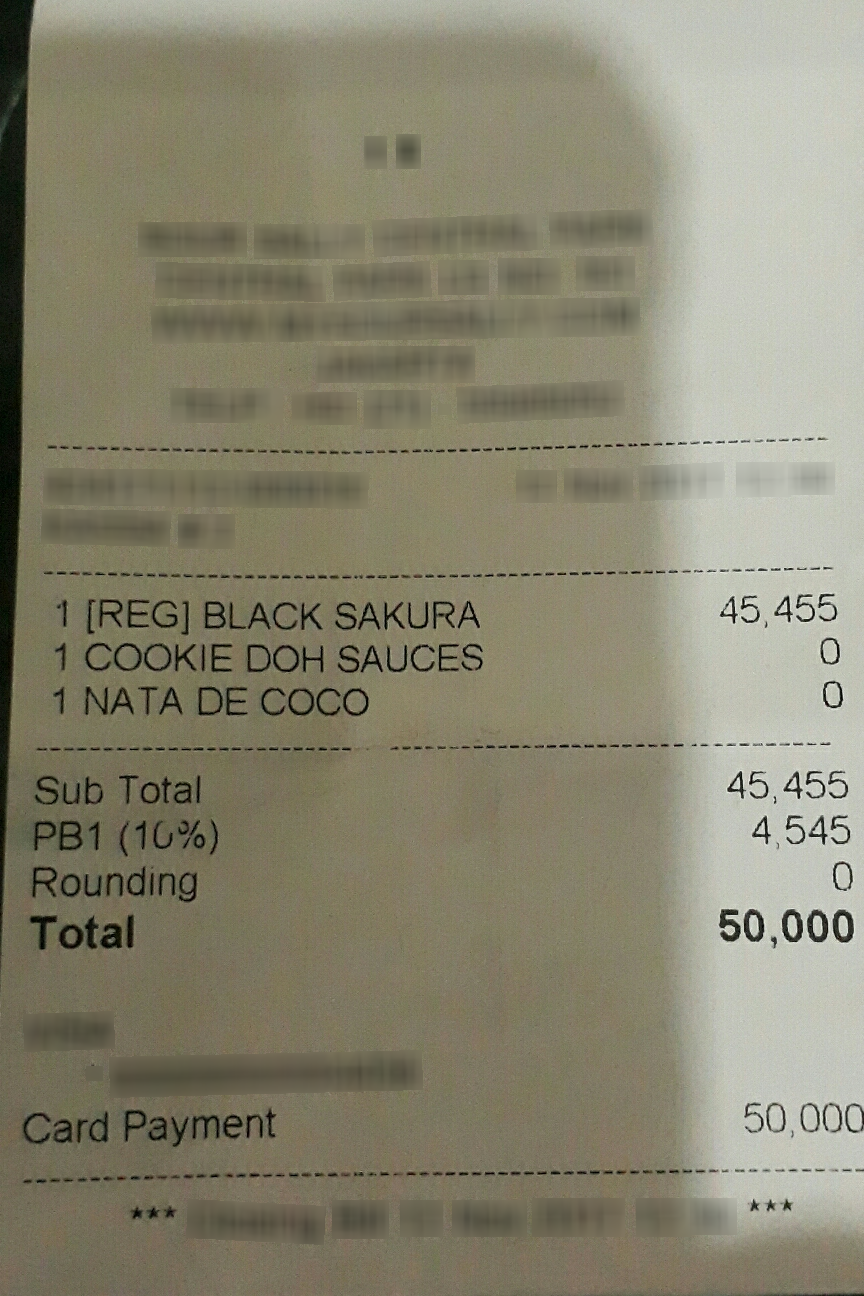

In [1]:
import re
import torch
import requests
from PIL import Image, ImageDraw

repo = "microsoft/kosmos-2.5-chat"
device = "cuda:0"
dtype = torch.bfloat16

# sample image
url = "https://huggingface.co/microsoft/kosmos-2.5/resolve/main/receipt_00008.png"

image = Image.open(requests.get(url, stream=True).raw)

image


In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="microsoft/kosmos-2.5-chat")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/503M [00:00<?, ?B/s]

Kosmos2_5TextForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
question = "What is the sub total of the receipt?"
template = " USER: {} ASSISTANT:"
prompt = template.format(question)


generated_text = pipe(images=image, text=prompt, max_new_tokens=1024)
generated_text[0]["generated_text"]

' USER: What is the sub total of the receipt? ASSISTANT: 45,455'

## Thank You